In [1]:
'''make sure the path is /home/jovyan/Housing_pricing'''


'make sure the path is /home/jovyan/Housing_pricing'

In [6]:
cd ..

/home/jovyan/Housing_pricing


In [7]:
% run __init__.py

In [8]:
% matplotlib inline

## 1. Load Data 

In [9]:
csv = 'data/train.csv'
df_housing = pd.read_csv(csv)
df_housing.set_index('Id')
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Exploratory Analysis 
### Check DataTypes

In [10]:
df_housing.shape

(1460, 81)

In [11]:
df_housing.info()  #a great way to see which features have non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Fill the nan values/missing values.

In [12]:
df_housing.isnull().sum() #find which features have null_values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [13]:
# making a mask with all the features that have null values
cols_w_nulls = [col for i, col in enumerate(df_housing.columns) 
             if df_housing.isnull().sum()[i] != 0]

In [ ]:
df_housing[cols_w_nulls].isnull().sum().sort_values(ascending = False)

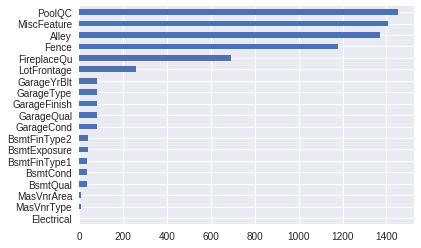

In [14]:
#displaying all the columns with null values
df_housing[cols_w_nulls].isnull().sum().sort_values(ascending = True).plot(kind = 'barh')

## Drop columns with too many missing features
- anything with over 1400 missing values will be dropped

In [15]:
df_housing.drop(labels = ['PoolQC', 'MiscFeature', 'Alley'] , axis = 1, inplace = True)

In [ ]:
cols_w_nulls

In [16]:
cols_w_nulls.remove('Alley')
cols_w_nulls.remove('PoolQC')
cols_w_nulls.remove('MiscFeature')
cols_w_nulls # without Alley, PoolQC, and MiscFeature 

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

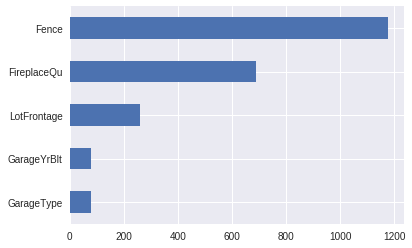

In [17]:
df_housing[cols_w_nulls].isnull().sum().nlargest(5).sort_values(ascending = True).plot(kind = 'barh')

## Tackling the biggest problem first : Fence
    - Fence: Fence quality (catagorical data)
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       

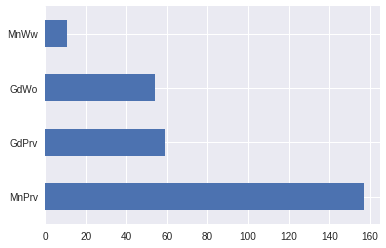

In [19]:
from sklearn.neighbors import KNeighborsClassifier
df_housing['Fence'].value_counts().plot(kind = 'barh')

In [20]:
df_housing['Fence'].isnull().sum() # this is the number of null values in the fence feature

1179

## Create a canonical list of fence qualities

In [21]:
fences = df_housing['Fence'].unique().tolist()
fences #list of all catagories

[nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']

In [112]:
columns = list(set(df_housing.columns) - set(cols_w_nulls)) #these will be our predictive features
dummied = pd.get_dummies(df_housing[columns])

In [113]:
dummied.isnull().sum().sum()

0

In [114]:
## Convert to numeric index, preserving our nulls
dummied['Fence'] = df_housing['Fence'].map(lambda x: fences.index(x) if type(x) != float else x)

In [133]:
only_predictors = list(set(dummied.columns) - set(["Fence"])) #only predictive feature (281 features)

y         = dummied[dummied['Fence'].notnull()]['Fence']
X         = dummied[dummied['Fence'].notnull()][only_predictors]
to_impute = dummied.loc[df_housing['Fence'].isnull()][only_predictors] #indexed by row all rows that have null values, 
                                                                        # and all the columns that are predictors

In [134]:
#verify shape, no nulls in target, and no inifinite values in training target
y.shape, y.isnull().sum(), np.isinf(y).sum()

((281,), 0, 0)

In [135]:
#there are still null values in the training matrix
X.shape, X.isnull().sum().sum(), np.isinf(X).sum().sum()

((281, 217), 0, 0)

## Basic KNN Model
The only thing we're not exploring is the possibility for cross-validation. This is also a great idea. You could split your data for validation if you use the known set of rows containing non-null "occupation" values.

In [136]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
model = knn.fit(X, y)

In [137]:
## Should always make sure your dimensions match up for training vs predicting (and/or testing)
# Most of this code I wrote to be boilerplate
X.shape, to_impute.shape

((281, 217), (1179, 217))

#### `to_impute` is our slice of "null" occupations.
We add our predictions back to our original DataFrame, using the predict function.

In [138]:
to_impute['predicted_fence'] = model.predict(to_impute)

In [139]:
to_impute['predicted_labels'] = to_impute['predicted_fence'].map(lambda p: fences[int(p)])

### We can add our labels back from or occupation reference list

In [142]:
to_impute[['predicted_fence', 'predicted_labels']].head()

,predicted_fence,predicted_labels
0,1.0,MnPrv
1,1.0,MnPrv
2,3.0,GdPrv
3,3.0,GdPrv
4,1.0,MnPrv


### Let's impute our original DataFrame!

In [143]:
## Notice the missing occupations line up perfectly!
df_housing.loc[to_impute.index].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [145]:
df_housing.loc[to_impute.index, 'Fence'] = to_impute['predicted_labels']

In [154]:
df_housing.Fence.isnull().sum() # verified it worked!

0